# Conditions and Constraints for Source Identification via Mean Comparison of Stochastic Signals

When we have two signals from two different signal emitters and are required to identify the stronger one, we typically compute the mean for each signal source. However, due to computational limitations or time constraints, we can only use a limited number of sampling points to estimate the means. In this study, we analyze the statistical characteristics of the source signals and the number of samples required for accurate source identification.

## 1. Introduction

When we have two sets of stochastic signals and intend to identify stronger one every moment.
$$
\begin{align*}
x &= [x_0, x_1, ...] \\
y &= [y_0, y_1, ...]
\end{align*}
$$
Comparison of moving average is a standard approach. 
$$
\begin{align*}
\mu_x = \frac{1}{n} \sum\limits_{i=1}^n x_i \\
\mu_y = \frac{1}{n} \sum\limits_{i=1}^n y_i
\end{align*}
$$
With this approach, we need to identify possible range of $n$ and statistical characteristics of the signals.

## 2. Preparation

Let's say we have following signals souces.

* Source $x$
    * Mean $\mu_x$, Variance $\sigma_x^2$, Normal distribution $N(\mu_x,\sigma_x^2)$
* Source $y$
    * Mean $\mu_y$, Variance $\sigma_y^2$ Normal distribution $N(\mu_y,\sigma_y^2)$

$x$ has higher storength and both have a same variance.
* $\sigma_x = \sigma_y = 20$
* $\mu_x = -60$ and $\mu_y = -70$

In [1]:
import math
import numpy as np
from scipy import integrate, special
import matplotlib.pyplot as plt

Prior probability P(x)=0.5, P(y)=0.5


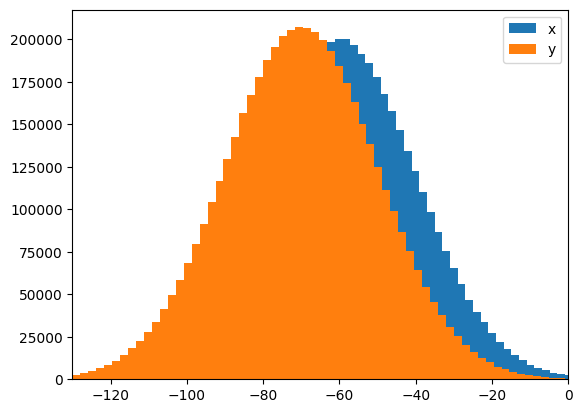

In [2]:
POINTS_X=5000000
POINTS_Y=5000000
mux    = -60
sigmax = 20
xs     = np.random.normal(loc=mux, scale=sigmax, size=POINTS_X)

muy    = -70
sigmay = 20
ys     = np.random.normal(loc=muy, scale=sigmay, size=POINTS_Y)

plt.hist(xs,bins=100, label="x")
plt.hist(ys,bins=100, label="y")
plt.legend()
plt.xlim(-130,-0)

Px = len(xs)/(len(xs) + len(ys))
Py = len(ys)/(len(xs) + len(ys))
print(f"Prior probability P(x)={round(Px,3)}, P(y)={round(Py,3)}")

## 3. Simulation

Collect n samples from each signal sources and compute means $\mu_x$ and $\mu_y$ .

Repat this for 0.1 million times, and find out a $\rm P(\mu_x \leq \mu_y)$
denoting a probability of $\mu_x \leq \mu_y$ .

### 3-1. Basic Simulation

In [3]:
n      = 40
TRIALS = 100000

def countYisBigger(mux, muy, sigmax, sigmay, sampling_size, trials):
    count_y_is_bigger = 0
    xmeans = np.zeros(trials)
    ymeans = np.zeros(trials)
    for i in range(trials):
        xSampleMean = np.random.normal(loc=mux, scale=sigmax, size=sampling_size).mean()
        ySampleMean = np.random.normal(loc=muy, scale=sigmay, size=sampling_size).mean()
        if(xSampleMean <= ySampleMean):
            count_y_is_bigger = count_y_is_bigger + 1
        xmeans[i] = xSampleMean
        ymeans[i] = ySampleMean
    return count_y_is_bigger, xmeans, ymeans

count_y_is_bigger, xmeans, ymeans = countYisBigger(mux, muy, sigmax, sigmay, n, TRIALS)
print(f"y is bigger {count_y_is_bigger} time(s)")
print(f"P={round(count_y_is_bigger / float(TRIALS),4)}")

y is bigger 1303 time(s)
P=0.013


$\mu_x \leq \mu_y$ can happen and $\rm P(\mu_x \leq \mu_y)$ confirmed.

### 3-2. Standard Error

With many $\mu_x$ and $\mu_y$, Standard Errors can be computed.
The simulated Errors are compared with theoretical values.

In [4]:
print("Simulated:")
print(f"E(xavgs)={round(xmeans.mean(),3)}, sigma(xavgs)={round(xmeans.std(),3)}")
print(f"E(yavgs)={round(ymeans.mean(),3)}, sigma(yavgs)={round(ymeans.std(),3)}")

print("Theoretical:")
print(f"sigmax/sqrt(n)={round(sigmax/np.sqrt(n),3)}")
print(f"sigmay/sqrt(n)={round(sigmay/np.sqrt(n),3)}")

Simulated:
E(xavgs)=-59.999, sigma(xavgs)=3.163
E(yavgs)=-70.018, sigma(yavgs)=3.165
Theoretical:
sigmax/sqrt(n)=3.162
sigmay/sqrt(n)=3.162


Simulated Standard Errors are nearly equals to theoretical values.

### 3-3. Bringing y Toward x

Move Distribution y toward distribution x by shifting $\mu_y$ to see chages in $\rm P(\mu_x \leq \mu_y)$ .

Three variances are used.
$$
\sigma_x = \sigma_y = [5,10,20]
$$

In [5]:
SIM_POINTS = 32

sigmas        = np.array([5,10,20])
muys          = np.linspace(mux-10, mux+10, SIM_POINTS)
counts_sigmas = np.zeros([len(sigmas), SIM_POINTS])

for i, sigma_i in enumerate(sigmas):
    for j, muy_i in enumerate(muys):
        count, _, _ = countYisBigger(mux, muy_i, sigma_i, sigma_i, n, TRIALS)
        counts_sigmas[i][j] = count

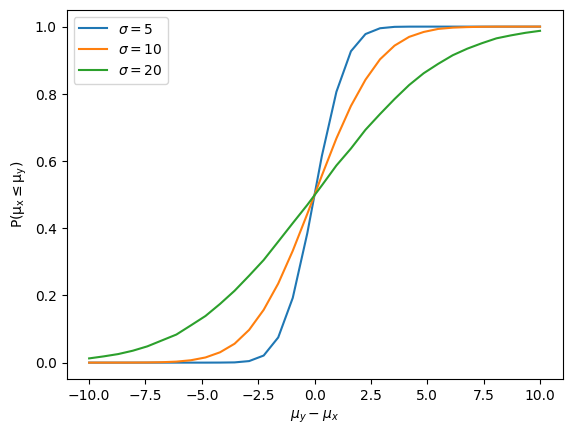

In [6]:
xydiff = muys - (-60)
for i, sigma_i in enumerate(sigmas):
    plt.plot(xydiff, counts_sigmas[i]/TRIALS, label=f"$\\sigma={sigma_i}$")
plt.legend()
plt.xlabel("$\\mu_y - \\mu_x$")
plt.ylabel("$\\rm{P}(\\mu_x \\leq \\mu_y)$")
plt.show()

* When $\mu_y \ll \mu_x$​, we have $\rm P(x \leq y) \simeq 0$. If the mean of distribution yy is significantly lower than that of distribution xx, it is practically impossible for the $n$-sample mean of $y$ to exceed the $n$-sample mean of $x$.
* Similarly, when $\mu_x \ll \mu_y$, we have $\rm P(x \leq y) \simeq 0$, meaning that the $n$-sample mean of $y$ consistently surpasses that of $x$.
* When $\mu_y - \mu_x = 0$ ($\mu_y = \mu_x$​), the probability $\rm P(x \leq y)$ is 0.5. If the distributions $x$ and $y$ overlap, their sample means will be nearly identical, and there will be an equal probability that either $\mu_x$ or $\mu_y$ is larger.
* If $\sigma$ is small, the slope changes sharply.

## 4. Theoretical Derivation

### 4-1. The Distribution of Sample Mean

It is well known that when $n$ is sufficiently large, the distribution of the sample mean follows a normal distribution $N(\mu, \frac{\sigma^2}{n})$ according to the Central Limit Theorem.

Thus, observation of $n$-sample mean $\mu_x$ should follow
$$
\mu_x \sim N(\mu_x, \frac{{\sigma_x}^2}{n})
$$
Similarly, and $n$-sample mean $\mu_y$ should follow
$$
\mu_x \sim N(\mu_x, \frac{{\sigma_x}^2}{n})
$$


### 4-2. $\mu_x - \mu_y$ の分布

標本平均の分布では、サンプリング毎に取得できる値は $[\mu_{x1}, \mu_{x2}, ...]$ と $[\mu_{y1}, \mu_{y2}, ...]$ である。

$\rm P(\mu_x \leq \mu_y)$ は $\rm P(\mu_x - \mu_y \leq 0)$ と等価であるため、 $\rm P(\mu_x - \mu_y \leq 0)$ の分布を求める。

簡単のために $\mu_x - \mu_y = \delta$ と置きかえると、求める分布は $\rm P(\delta \leq 0)$ である。

#### 平均
$\delta$  の分布の平均は、
$$
\begin{align*}
\rm E(\delta) &= \rm E(\mu_x - \mu_y) \\
&= \rm E(\mu_x) - \rm E(\mu_y) \\
&= \bar{\mu_x} - \bar{\mu_y} \\
\end{align*}
$$
$\bar{\delta}=\bar{\mu_x} - \bar{\mu_y}$ と置いて、$\delta$ の平均は
$$
\rm E(\delta) = \bar{\delta}
$$
と表記することにする。

#### 分散
分散は、
$$
\begin{align*}
\rm Var(\delta) &= \rm Var(\mu_x - \mu_y) \\
&= \rm Var(\mu_x) + \rm Var(\mu_y) \\
& = \sigma_x^2 + \sigma_y^2
\end{align*}
$$
$\sigma_{\delta}^2 = \sigma_x^2 + \sigma_y^2$ と置いて、分散を
$$
\rm Var(\delta) = \sigma_{\delta}^2
$$
と表記することにする。

#### 標準偏差
標本平均を集めたときの標準偏差 $\sigma_z$は、
$$
\begin{align*}
\sigma_{z} &= \sqrt{\rm Var(\mu_x - \mu_y)} \\
&= \sqrt{\sigma_x^2 + \sigma_y^2} \\
&= \sqrt{\sigma_{\delta}^2} \\
&= \sigma_{\delta}
\end{align*}
$$
である。

4-3. 標準化

$\rm P(\delta \leq 0)$  を求めるために、$\delta$ を標準化する。
$$
\begin{align*}
z &= \frac{\delta - \rm E(\delta)}{\sigma_z} \\
&= \frac{\delta - \bar{\delta}}{\sigma_{\delta}}
\end{align*}
$$

z の取りうる範囲は、 $\delta \leq 0$ と上式から求められる。
$$
z \leq \frac{\bar{\delta}}{\sigma_{\delta}}
$$

よって、求める確率の計算は以下となる。
$$
\rm P(\delta) = \rm P(z \leq \frac{\bar{\delta}}{\sigma_{\delta}})
$$

この計算は 標準正規分布の累積分布関数(CDF) $\Phi(z)$ を用いて表される。
$$
\begin{align*}
\rm \Phi(z) &= \Phi(\delta) \\
&= \Phi (\frac{\bar{\delta}}{\sigma_{\delta}})
\end{align*}
$$
累積分布関数は次のように与えられる。

$$
\rm \Phi(z) = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{z} e^{-\frac{t^2}{2}} dt
$$
この関数は、誤差関数(ERF) と次の関係がある。

$$
\rm \Phi(z) = \frac{1}{2}[ 1+\rm{erf} (\frac{z}{\sqrt{2}})]
$$

ここで誤差関数は
$$
\rm erf (x) = \frac{2}{\sqrt{\pi}} \int_0^x e^{- t^2} dt
$$
であるが、 $\rm erf(x)$ は、解析的に解けないため、近似式を求める方法が何種類か知られている。

ここでは、最終的に求める式に ERF を用いて以下とする。
$$
\begin{align*}
\rm P(\delta) &= \rm P(z \leq \frac{\bar{\delta}}{\sigma_{\delta}}) \\
&= \rm \Phi(\frac{\bar{\delta}}{\sigma_{\delta}})  \\
&= \frac{1}{2}[ 1+\rm erf (\frac{\bar{\delta}\sqrt{2}}{2 \sigma_\delta}) ]
\end{align*}
$$

## 5. シミュレーションと理論値の比較

前述した標準正規分布からの確率の求め方と、シミュレーション結果を比較して間違いがないか確認を行う。
標準正規分布の累積確率密度の計算は python の組み込み erf 関数を用いた。


Text(0, 0.5, '$\\rm{P}(\\mu_x \\leq \\mu_y)$')

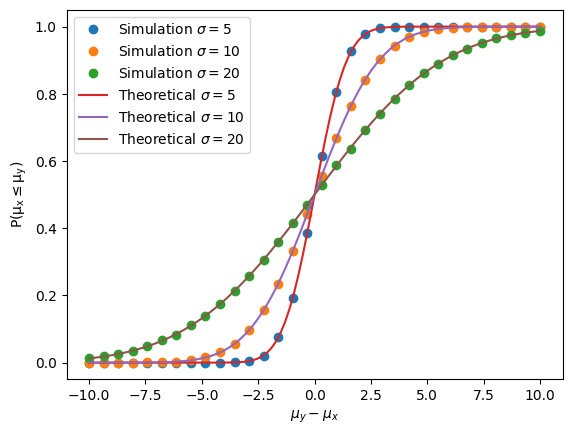

In [7]:
def phi(x):
    return (1.0 + special.erf(x / np.sqrt(2.0))) / 2.0

def phi_(x):
    'Cumulative distribution function for the standard normal distribution'
    return (1.0 + math.erf(x / math.sqrt(2.0))) / 2.0

deltas = np.linspace(-10, 10, 100)
zss    = np.zeros([len(sigmas), len(deltas)])
for i, sigma_i in enumerate(sigmas):
    sigmadelta  = (sigma_i**2 + sigma_i**2)/n
    zs          = deltas / (np.sqrt(sigmadelta))
    zss[i]      = zs
    plt.plot(xydiff, counts_sigmas[i]/TRIALS, "o", label=f"Simulation $\\sigma={sigma_i}$", )

for i, sigma_i in enumerate(sigmas):
    approx = np.zeros(len(deltas))
    approx = phi(zss[i])
    plt.plot(deltas, approx,  label=f"Theoretical $\\sigma={sigma_i}$")

plt.legend()
plt.xlabel("$\\mu_y - \\mu_x$")
plt.ylabel("$\\rm{P}(\\mu_x \\leq \\mu_y)$")

縦軸は $\rm P(x \leq y)$ のままに、横軸を $\frac{\mu_y - \mu_x}{\sigma}$ にすると $\sigma$ の違いがあっても 1 本の線上でシンプルに表現できる。

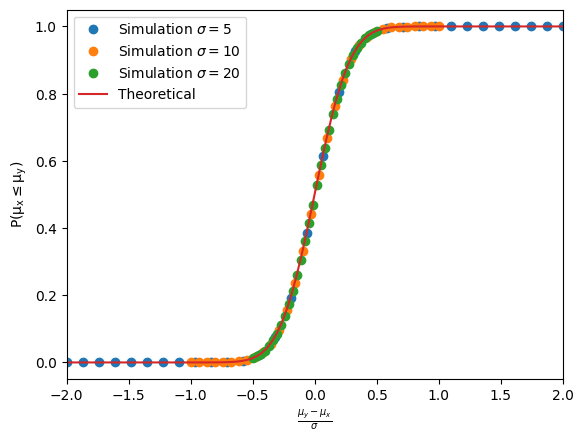

In [8]:
for i, sigma_i in enumerate(sigmas):
    plt.plot(xydiff/sigma_i, counts_sigmas[i]/TRIALS,  "o", label=f"Simulation $\\sigma={sigma_i}$")

delta        = np.linspace(-2, 2, 100)
sigmadelta10 = (10**2 + 10**2)/40
zs10         = 10 * delta / (np.sqrt(sigmadelta10))
p10          = phi(zs10)
plt.plot(delta, p10, label="Theoretical")

plt.legend()
plt.xlabel("$\\frac{\\mu_y - \\mu_x}{\\sigma}$")
plt.ylabel("$\\rm{P}(\\mu_x \\leq \\mu_y)$")
plt.xlim(-2,2)
plt.show()

# 6. 近似解
今後、解析的に分析を進めたい場合に、erf 関数を近似できていれば根拠づけが容易になるので、
よく知られている 3 つの erf の近似関数と数値積分(python の組み込み erf 関数) の比較を行った。

## 6-1. Abramowitz and Stegun の式

実用性と精度のバランスが良く、広く使われているという Abramowitz and Stegun の式を用いてみる。

$$
\Phi(z) \simeq 1 - \frac{1}{\sqrt{2 \pi}} { e^{-\frac{z^2}{2}} }(b_1 t + b_2 t^2 + b_3 t^3 + b_4 t^4 + b_5 t^5)
$$

ここで:
* $t = \frac{1}{1+p z}$
* $p = 0.2316419$
* $b_1 = 0.319381530$, $b_2=−0.356563782$, $b3=1.781477937$, $b_4 = -1.821255978$, $b_5=1.330274429$

この式は z が正のときに精度が高いとされるので、z が負のときは以下のように変換して使う。
$$
\Phi(z) = 1-\Phi(-z)
$$


## 6-2. Hastings の近似式

計算が簡単だがやや精度が落ちる有名な近似式に Hasting の式がある。
これは Abramowitz and Stegun の 4 乗以降の項を省略したものである。

$$
\Phi(z) \simeq 1 - \frac{1}{\sqrt{2 \pi}} { e^{-\frac{z^2}{2}} }(b_1 t + b_2 t^2 + b_3 t^3)
$$

こちらも同様に z が負のときは以下の変換が必要。
$$
\Phi(z) = 1-\Phi(-z)
$$

## 6-3. テーラー展開

確率密度関数 $\Phi(z)=\frac{1}{\sqrt{2 \pi}} e^{- \frac{z^2}{2}}$ をテーラー展開で近似してその有用性を確認してみる。
テーラー展開後の式は以下となる。
$$
\Phi(z) \simeq \frac{1}{2} + \frac{1}{\sqrt{2 \pi}} (z - \frac{z^3}{6}+ \frac{z^5}{40} - \frac{z^7}{336}+...)
$$

## 6-4. 比較

$\sigma=10$のときの $P(\mu_x < \mu_y)$ について、数値積分(Simulation) と 3 つの近似関数の比較を行った。

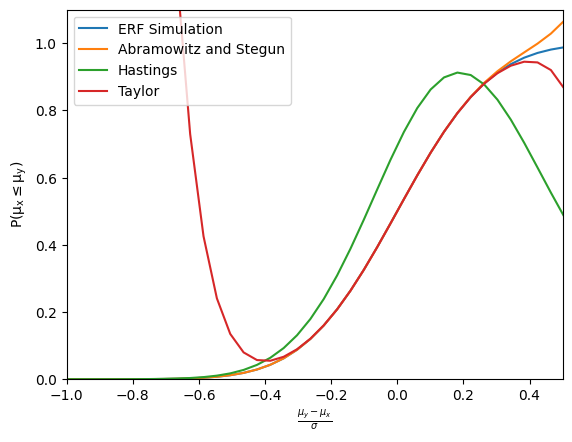

In [9]:
def phi_abst_positive(z):
    p=0.2316419
    b1 = 0.319381530
    b2 =-0.356563782
    b3 = 1.781477937
    b4 =-1.821255978
    b5 = 1.330274429
    t  = 1/(1+p * z)
    return 1-1/(np.sqrt(2 * np.pi)) * np.exp(-(z**2)/2) * (b1*t + b2*(t**2) + b3*(t**3) + b4*(t**4) + b5*(t**5))

def phi_abst_negative(z):
    return 1-phi_abst_positive(-1*z)

def phi_hastings(z):
    p=0.2316419
    b1 = 0.319381530
    b2 =-0.356563782
    b3 = 1.781477937
    t  = 1/(1+p * z)
    return 1-1/(np.sqrt(2 * np.pi)) * np.exp(-(z**2)/2) * (b1*t + b2*(t**2) + b3*(t**3))

def phi_hastings_negative(z):
    return 1-phi_hastings(-1*z)

def phi_taylor4(z):
    return 0.5 + (1.0/math.sqrt(2.0 * math.pi)) * (z - (z**3)/6.0 + (z**5)/40 - (z**7)/336)

sigma10      = 10
delta        = np.linspace(-2.0, 2.0, 100)
sigmadelta10 = (sigma10**2 + sigma10**2)/n
zs10         = 10*delta / (np.sqrt(sigmadelta10))

simulation  = phi(zs10)
approx_abst = phi_abst_negative(zs10)
approx_hast = phi_hastings_negative(zs10)
approx_tay4 = phi_taylor4(zs10)

plt.plot(delta, simulation,  label="ERF Simulation")
plt.plot(delta, approx_abst, label="Abramowitz and Stegun")
plt.plot(delta, approx_hast, label="Hastings")
plt.plot(delta, approx_tay4, label="Taylor")

plt.legend()
plt.xlabel("$\\frac{\\mu_y - \\mu_x}{\\sigma}$")
plt.ylabel("$\\rm{P}(\\mu_x \\leq \\mu_y)$")
plt.xlim(-1,0.5)
plt.ylim(0,1.1)
plt.show()

* 全般的に $P(\mu_x \le \mu_y)=1$ 付近では誤差が大きくなる。本研究では確率がランダムな選択より悪くなるような 0.5 を超えるケースには注目しないので、0.5 を超えない範囲で近似関数は使用すべきだろう。
* Abranmowitz and Stegun の式が前評判通り最も精度が高い。$P(\mu_x \le \mu_y)=0.95$ くらいまでなら、ほぼ全域に渡って活用できそうである。
* Hastings の近似式はグラフの立ち上がり付近で精度が高い。確率 0 から増え始める現象についての解析に利用できそうである。
* Taylor 展開は、確率 0.5 の前後で精度が高い。確率 1/2 をまたぐ際のダイナミクスの解析に利用できそうである。

